# Analysis with simulated data

- data in the "caclean-masterdir” onedrive folder:
    - 4D TIFFs (the name starts with confocalSNR…,)
    - can be opened straight with Fiji/ImageJ (setting B & C to scale from 1.0 to 1.8 and choosing the jet lookup table)
    - contain FCa normalised as F/F_0
    - time steps are 1ms 
    - x,y,z voxel size is 0.215 um or very similar

- **REMARK**: not part yet of project --> do not upload in github at the end

In [1]:
# autoreload is used to reload modules automatically before entering the
# execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2
# To import modules from parent directory in Jupyter Notebook
import sys

sys.path.append("..")

In [32]:
import numpy as np
import napari
import os
from scipy.ndimage import gaussian_filter, grey_dilation
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, grey_dilation
from skimage.filters import threshold_otsu

# import tifffile
# from scipy import signal
from scipy.io import loadmat

#### Load data

Load noisy data

---> don't need this for the moment

In [3]:
# data_path = r'C:\Users\dotti\OneDrive - Universitaet Bern\caclean-masterdir'
# filename_snr100 = 'confocalSNR100.tiff'
# filemane_snr20 = 'confocalSNR20.tiff'


# # load tiff volume
# data_snr100 = tifffile.imread(os.path.join(data_path, filename_snr100)) # 151(t) x 22(z) x 80(y) x 54(x)
# data_snr20 = tifffile.imread(os.path.join(data_path, filemane_snr20)) # 151(t) x 22(z) x 80(y) x 54(x)
# # need to pad data

In [4]:
# data_snr100.shape, data_snr20.shape

In [5]:
# fig_t = 80
# fig_z = 11

# # plot sample frame from data_snr100 and data_snr20
# plt.figure(figsize=(6,6))
# plt.subplot(1,2,1)
# plt.imshow(data_snr100[fig_t,fig_z,:,:])
# plt.title('SNR 100')
# plt.subplot(1,2,2)
# plt.imshow(data_snr20[fig_t,fig_z,:,:])
# plt.title('SNR 20')
# plt.show()

In [6]:
# # open snr_100 using napari
# viewer = napari.view_image(data_snr100)

Load clean data

---> need to find/generate corresponding noisy data

In [7]:
clean_data_path = r"C:\Users\dotti\OneDrive - Universitaet Bern\caclean-masterdir\CardiacCalcium_TestCaCLEAN\simulatedMicroscopy_outputs"
filename_clean = "FCa_1umSpacing_NoMito_interp53_151timesteps.npz"
data_clean = np.load(os.path.join(clean_data_path, filename_clean))

In [8]:
data_clean.files

['nn_interp']

In [9]:
data_clean = data_clean["nn_interp"]  # 151(t) x 213(z) x 205(y) x 317(x)

In [10]:
data_clean.shape

(151, 213, 205, 317)

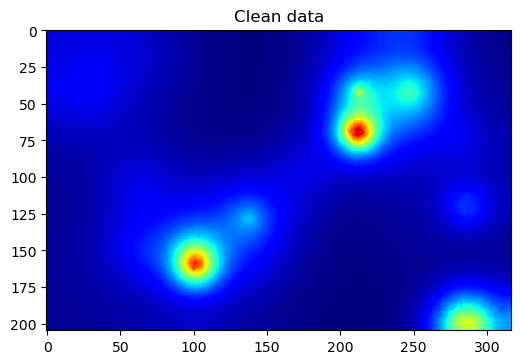

In [11]:
fig_t = 75
fig_z = 106

# plot sample frame from data_clean
plt.figure(figsize=(6, 6))
plt.imshow(data_clean[fig_t, fig_z, :, :], cmap="jet")
plt.title("Clean data")
plt.show()

In [12]:
data_clean[fig_t, fig_z, :, :].shape, data_clean[fig_t, fig_z, :, :].squeeze().shape

((205, 317), (205, 317))

In [13]:
# visualize clean data with Napari
viewer = napari.view_image(data_clean)

Load Matlab files

---> don't need this for the moment

In [14]:
# matlab_data_path = r'C:\Users\dotti\OneDrive - Universitaet Bern\caclean-masterdir\CardiacCalcium_TestCaCLEAN\simulatedMicroscopy_outputs'
# # load matlab file
# mat = loadmat(os.path.join(matlab_data_path,
#                           'simulatedMicroscopyResults_interp53_SNR20_1umSpacing_NoMito_54x80x151.mat'))
# #this is the same data as data_snr20 !!!

In [15]:
# mat.keys()

In [16]:
# data_denoised = mat['MultiIdenoised']
# data_bgr = mat['MultiBgr']

In [17]:
# clean_mat = data_denoised - data_bgr
# clean_mat = np.transpose(clean_mat, (3,0,2,1))

In [18]:
# data_denoised.shape, data_bgr.shape, clean_mat.shape

In [19]:
# viewer = napari.Viewer()
# viewer.add_image(data_snr20,
#                  name='data snr20')
# viewer.add_image(clean_mat,
#                  name='clean_mat')

### Try to retrieve sparks' exact location from Matlab files

In [31]:
data_path = r"C:\Users\dotti\OneDrive - Universitaet Bern\caclean-masterdir"
matlab_fn = "Cyto_8Sarc_1319kNodes_spherical_ryr_kie_wh0.05.FixedNnd_offset05_N50_1umSpacing_tausimnum_unifdistlow1.mat"

In [37]:
# Load the .mat file into a dictionary
matlab_data = loadmat(os.path.join(data_path, matlab_fn))

In [40]:
# Print the names of the variables in the dictionary
print(matlab_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'nonzeroIntensities', 'nonzeroNodes', 'nonzeroTimelags'])


In [46]:
nonzeroIntensities = matlab_data["nonzeroIntensities"]
nonzeroNodes = matlab_data["nonzeroNodes"]
nonzeroTimelags = matlab_data["nonzeroTimelags"]

# keys '__header__', '__version__', '__globals__' are not needed

In [52]:
nonzeroIntensities.shape, nonzeroNodes.shape, nonzeroTimelags.shape

((37188, 1), (37188, 1), (37188, 1))

**Explanation of data types**:

`<f8` represents a 64-bit floating-point number, and `<i4` represents a 32-bit
integer. The little-endian notation (`<`) is used to describe how the bytes are
arranged in memory, and it is relevant when dealing with binary data and memory
layout, particularly when data is exchanged between systems with different byte
orders (little-endian vs. big-endian).

In [54]:
nonzeroIntensities.dtype, nonzeroNodes.dtype, nonzeroTimelags.dtype

(dtype('<f8'), dtype('<i4'), dtype('<f8'))

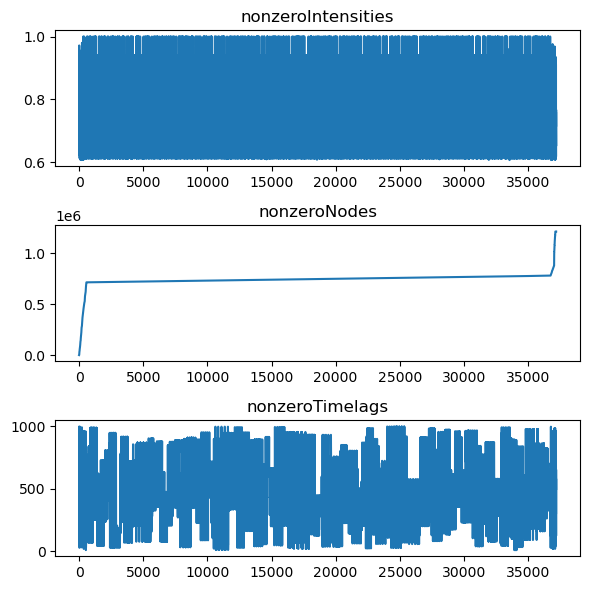

In [51]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

axs[0].plot(nonzeroIntensities)
axs[0].set_title("nonzeroIntensities")

axs[1].plot(nonzeroNodes)
axs[1].set_title("nonzeroNodes")

axs[2].plot(nonzeroTimelags)
axs[2].set_title("nonzeroTimelags")

plt.tight_layout()
plt.show()

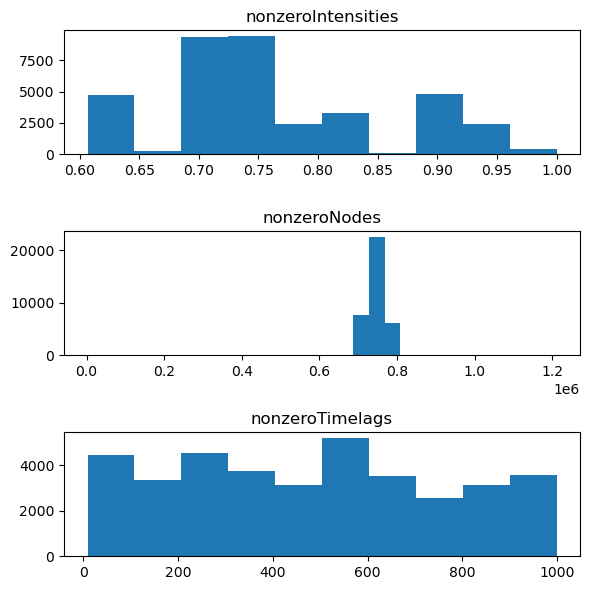

In [58]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

axs[0].hist(nonzeroIntensities.squeeze())
axs[0].set_title("nonzeroIntensities")

axs[1].hist(nonzeroNodes.squeeze(), bins=30)
axs[1].set_title("nonzeroNodes")

axs[2].hist(nonzeroTimelags.squeeze())
axs[2].set_title("nonzeroTimelags")

plt.tight_layout()
plt.show()

### Create annotations from noise-free simulated data

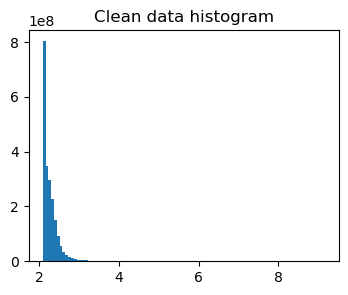

In [20]:
# plot data_clean histogram
plt.figure(figsize=(4, 3))
plt.hist(data_clean.flatten(), bins=100)
plt.title("Clean data histogram")
plt.show()

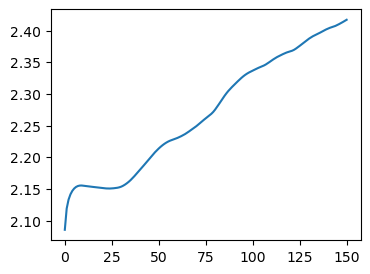

In [21]:
# plot data_clean average intensity over time
plt.figure(figsize=(4, 3))
plt.plot(np.mean(data_clean, axis=(1, 2, 3)))

**Remarks:**
- I'm looking for maxima in each slice along the z-axis, as this is the way I am computing maxima in the original dataset (tyx data).
- I need to detrend the data because the average fluorescence increases along time.

In [22]:
# # detrend data_snr100 along time axis
# data_clean_detrended = signal.detrend(data_clean, axis=0, type='linear')

In [23]:
# # plot detrended data_snr100 average intensity over time
# plt.figure(figsize=(4,3))
# plt.plot(np.mean(data_snr100_detrended, axis=(1,2,3)))

In [24]:
# # visualize detrended data using napari
# viewer = napari.Viewer()
# viewer.add_image(data_snr100,
#                  name='data snr100')
# viewer.add_image(data_snr100_detrended,
#                  name='data snr100 detrended')

In [25]:
def nonmaxima_suppression_tzyx(vol, neighborhood_radius=5, sigma=1.0, percentile=90):
    """
    vol is a noisy 4D array of shape (t, z, y, x)
    """
    # smooth data_
    smooth = gaussian_filter(vol, sigma=(sigma, 0, sigma, sigma))

    # compute smoot data's otus threshold
    otsu_t = threshold_otsu(smooth)

    # compute percentile of smooth data where otsu threshold is exceeded
    percentile_smooth = np.percentile(smooth[smooth > otsu_t], percentile)

    # threshold smooth data wrt 90th percentile
    thresholded_smooth = smooth > percentile_smooth

    # dilate smooth data
    dilated_smooth = grey_dilation(
        smooth, (neighborhood_radius, 0, neighborhood_radius, neighborhood_radius)
    )

    # get mask where smooth data is equal to dilated smooth data and
    # smooth data is above threshold
    argmaxima = np.logical_and(smooth == dilated_smooth, thresholded_smooth)

    # compute maxima's coordinates
    argwhere = np.argwhere(argmaxima)

    return argwhere, argmaxima, thresholded_smooth

In [26]:
def clean_nonmaxima_suppression_tzyx(vol, neighborhood_radius=5, threshold=0.5):
    """
    vol is a 4D array of shape (t, z, y, x)
    """
    # get mask where data is equal to dilated data and
    # data is above threshold
    argmaxima = np.logical_and(
        vol
        == grey_dilation(
            vol, (neighborhood_radius, 0, neighborhood_radius, neighborhood_radius)
        ),
        vol > threshold,
    )

    # compute maxima's coordinates
    argwhere = np.argwhere(argmaxima)

    return argwhere, argmaxima

In [27]:
# find local maxima in data_clean

t = data_clean.min() + 2 * data_clean.std()

argwhere, argmaxima = clean_nonmaxima_suppression_tzyx(
    vol=data_clean, neighborhood_radius=15, threshold=t
)

# find local maxima in detrended data_snr100
# argwhere_detrended, argmaxima_detrended, thresholded_smooth_detrended = nonmaxima_suppression_tzyx(
#     vol=data_snr100_detrended,
#     neighborhood_radius=5,
#     sigma=0.5,
#     percentile=99
#     )

In [28]:
argmaxima.shape

(151, 213, 205, 317)

In [29]:
len(argwhere)

3206

In [30]:
# visualize local maxima with napari
viewer = napari.Viewer()
viewer.add_image(data_clean, name="clean data")

# viewer.add_labels(argmaxima,
#                   name='local maxima',
#                   opacity=0.5,
#                   #visible=False
#                   )

# viewer.add_labels(argmaxima_detrended,
#                     name='local maxima detrended',
#                     opacity=0.5,
#                     #visible=False
#                     )

# viewer.add_labels(thresholded_smooth,
#                     name='thresholded smooth',
#                     opacity=0.5,
#                     #visible=False
#                     )
viewer.add_points(
    argwhere,
    name="local maxima coordinates",
    size=5,
    opacity=0.5,
    face_color="red",
    # visible=False
)

<Points layer 'local maxima coordinates' at 0x29fd95931f0>

#### Interpolate video to match original dataset's sampling time

This is done via the method `video_spline_interpolation` of the `SparkDataset` class

### Run UNet on simulated data

#### Load UNet model